In [8]:
!python3.9 -m pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 KB 3.6 MB/s eta 0:00:00a 0:00:01
You should consider upgrading via the '/usr/local/bin/python3.9 -m pip install --upgrade pip' command.


In [1]:
import numpy as np
import pandas as pd
import openpyxl ## To read, write excel file


## Loading Dataset

In [2]:
df = pd.read_excel("/Volumes/DriveB/clustering/Online Retail.xlsx")

In [3]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.shape

(541909, 8)

In [5]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
df.drop(columns=['InvoiceNo','CustomerID','InvoiceDate'], inplace=True)

In [7]:
df['Description'] = df['Description'].fillna('Unknown')

In [8]:
df.isna().sum()

StockCode      0
Description    0
Quantity       0
UnitPrice      0
Country        0
dtype: int64

In [9]:
df.isna().sum()

StockCode      0
Description    0
Quantity       0
UnitPrice      0
Country        0
dtype: int64

In [10]:
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [11]:
# List of categorical columns to encode
categorical_columns = ['Description', 'Country', 'StockCode']

for cat_col in categorical_columns:
    df[cat_col] = df[cat_col].astype(str)
    
# Encode each categorical column
for cat_col in categorical_columns:
    encoder = LabelEncoder()
    df[cat_col] = encoder.fit_transform(df[cat_col])

In [12]:
df.head()

,StockCode,Description,Quantity,UnitPrice,Country
0,3536,3919,6,2.55,36
1,2794,3927,6,3.39,36
2,3044,913,8,2.75,36
3,2985,1910,6,3.39,36
4,2984,2911,6,3.39,36


In [13]:
# Initializing Standard Scalar
scaler = StandardScaler()

#Creating a copy of dataframe
X = df.copy()

#Scaling the data
X_scaled = scaler.fit_transform(X)

In [14]:
X_scaled[:3]

array([[ 2.02111495,  1.55519052, -0.01628867, -0.02130135,  0.27965099],
       [ 1.22566499,  1.56216464, -0.01628867, -0.01262006,  0.27965099],
       [ 1.49367373, -1.06533257, -0.00711777, -0.01923438,  0.27965099]])

### Import necessary libraries:

In [15]:
from sklearn.decomposition import PCA

### Perform PCA on scaled data

In [16]:
pca = PCA()
fit_data = pca.fit_transform(X_scaled)

### Generate a list of principal component names:

In [17]:
pc_list = [f'PC{i}' for i in list(range(1, pca.n_features_ +1))]
pc_list

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


['PC1', 'PC2', 'PC3', 'PC4', 'PC5']

### Create a dictionary with principal components and their explained variance ratios:

In [18]:
pc_data = {
    'pc': pc_list,
    'exp_variance': list(pca.explained_variance_ratio_)
}
pc_data

{'pc': ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'],
 'exp_variance': [0.20996721890468448,
  0.20249803006820727,
  0.1992956314205139,
  0.19605798579014627,
  0.19218113381644805]}

### Convert the dictionary to a DataFrame:

In [19]:
pc_df = pd.DataFrame(pc_data)

pc_df

,pc,exp_variance
0,PC1,0.209967
1,PC2,0.202498
2,PC3,0.199296
3,PC4,0.196058
4,PC5,0.192181


### Visualize the cumulative explained variance:

In [20]:
import altair as alt
alt.Chart(pc_df).mark_line().transform_window(cum_var = 'sum(exp_variance)').encode(
    x=alt.X('pc:N', sort = list(X.columns)),
    y = 'cum_var:Q'
).properties(width=600)

alt.Chart(...)

## Loadings indicate the contribution of each feature to the principal components.

### Create a dictionary of PC loadings:

In [21]:
pc_loadings = dict(zip(pc_list, pca.components_))
pc_loadings

{'PC1': array([ 0.65040625, -0.4470993 , -0.06331666,  0.58444901,  0.17743809]),
 'PC2': array([-0.12069254, -0.1400885 , -0.63050878, -0.25638075,  0.70889781]),
 'PC3': array([ 0.1145444 ,  0.5996957 , -0.64021217,  0.35403589, -0.30336712]),
 'PC4': array([0.11494317, 0.62251533, 0.43397329, 0.21161068, 0.60510399]),
 'PC5': array([-0.73216983, -0.18252989,  0.01565989,  0.65005214,  0.08830155])}

### Convert the PC loadings dictionary to a DataFrame:

In [22]:
loadings_df = pd.DataFrame(pc_loadings)

loadings_df

,PC1,PC2,PC3,PC4,PC5
0,0.650406,-0.120693,0.114544,0.114943,-0.732170
1,-0.447099,-0.140089,0.599696,0.622515,-0.182530
2,-0.063317,-0.630509,-0.640212,0.433973,0.015660
3,0.584449,-0.256381,0.354036,0.211611,0.650052
4,0.177438,0.708898,-0.303367,0.605104,0.088302


In [23]:
loadings_df.insert(0,'feature_names', X.columns)
loadings_df

,feature_names,PC1,PC2,PC3,PC4,PC5
0,StockCode,0.650406,-0.120693,0.114544,0.114943,-0.732170
1,Description,-0.447099,-0.140089,0.599696,0.622515,-0.182530
2,Quantity,-0.063317,-0.630509,-0.640212,0.433973,0.015660
3,UnitPrice,0.584449,-0.256381,0.354036,0.211611,0.650052
4,Country,0.177438,0.708898,-0.303367,0.605104,0.088302


### Visualize loadings for each PC:

In [24]:
alt.Chart(loadings_df).mark_bar().encode(
    x='PC1:Q',
    y="feature_names:N"
)

alt.Chart(...)

In [25]:
alt.Chart(loadings_df).mark_bar().encode(
    x='PC2:Q',
    y="feature_names:N"
)

alt.Chart(...)

In [26]:
alt.Chart(loadings_df).mark_bar().encode(
    x='PC3:Q',
    y="feature_names:N"
)

alt.Chart(...)

In [27]:
alt.Chart(loadings_df).mark_bar().encode(
    x='PC4:Q',
    y="feature_names:N"
)

alt.Chart(...)

In [28]:
alt.Chart(loadings_df).mark_bar().encode(
    x='PC5:Q',
    y="feature_names:N"
)

alt.Chart(...)

### Fit PCA with 4 components and create a DataFrame:

In [29]:
pca = PCA(4).fit(X_scaled)
pca_df = pd.DataFrame(pca.transform(X_scaled))

pca_df.columns = ['PC1', 'PC2','PC3','PC4']

pca_df

,PC1,PC2,PC3,PC4
0,0.657424,-0.247822,1.082198,1.358085
1,0.142014,-0.155020,0.998340,1.272832
2,1.486634,0.176629,-0.554873,-0.329439
3,1.061346,0.066591,-0.032680,0.201769
4,0.670494,-0.055526,0.490513,0.744875
...,...,...,...,...
541904,-0.810961,-2.432780,1.127827,-1.953482
541905,0.028431,-2.254660,0.328617,-2.816514
541906,0.277518,-2.299293,0.387122,-2.770612
541907,0.278605,-2.299300,0.386722,-2.771031


### Additional Steps
### Explained Variance Ratio:

##### Explained Variance Ratio:

##### This is the proportion of the dataset's variance that each principal component accounts for.
##### It helps in understanding the importance of each component.
##### Output: explained_variance_ratio

In [30]:
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)


Explained Variance Ratio: [0.20996722 0.20249803 0.19929563 0.19605799]


### Cumulative Explained Variance:

#### Cumulative Explained Variance:

#### This is the cumulative sum of the explained variance ratio.
#### It helps in determining how many principal components are needed to explain a desired amount of the total variance.
#### Output: cumulative_explained_variance

In [31]:
cumulative_explained_variance = explained_variance_ratio.cumsum()
print("Cumulative Explained Variance:", cumulative_explained_variance)


Cumulative Explained Variance: [0.20996722 0.41246525 0.61176088 0.80781887]


### Interpreting Loadings:

#### Interpreting Loadings:

#### Loadings represent the contribution of each original feature to the principal components.
#### They help in understanding the composition of each principal component.
#### Output: loadings

In [32]:
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3', 'PC4'], index=X.columns)
print("Loadings:")
print(loadings)

Loadings:
                  PC1       PC2       PC3       PC4
StockCode    0.650406 -0.120693  0.114544  0.114943
Description -0.447099 -0.140089  0.599696  0.622515
Quantity    -0.063317 -0.630509 -0.640212  0.433973
UnitPrice    0.584449 -0.256381  0.354036  0.211611
Country      0.177438  0.708898 -0.303367  0.605104


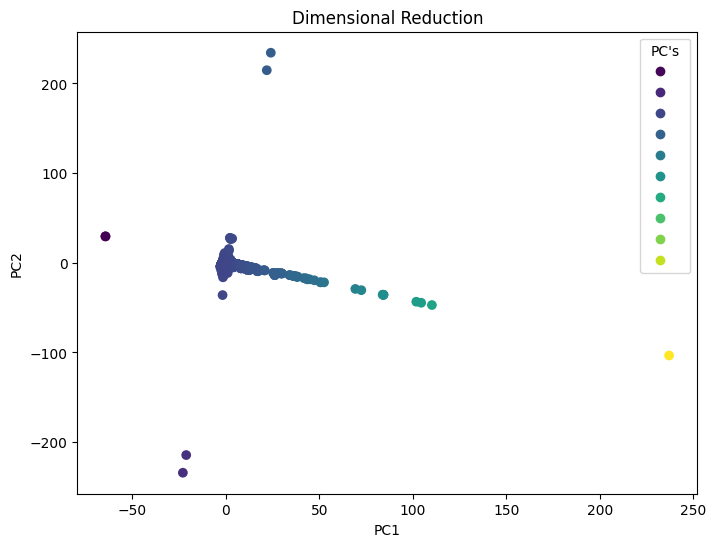

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
x_axis=pca_df['PC1']
y_axis = pca_df['PC2']
scatter= plt.scatter(x_axis, y_axis, c=pca_df.PC1)

plt.title('Dimensional Reduction')
plt.xlabel("PC1")
plt.ylabel("PC2")

plt.legend(handles=scatter.legend_elements()[0], 
           title="PC's")

plt.savefig("scatterplot_colored_by_variable_legend_first_try_matplotlib_Python.png",
                    format='png',dpi=150)
plt.show()

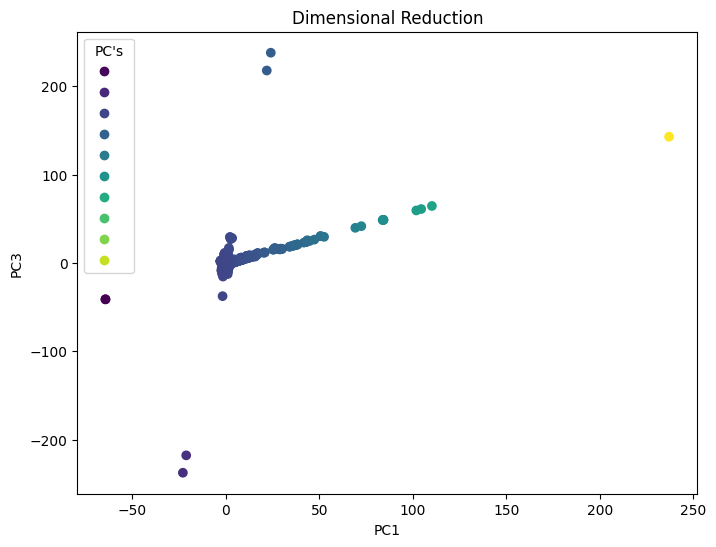

In [34]:
plt.figure(figsize=(8,6))
x_axis=pca_df['PC1']
y_axis = pca_df['PC3']
scatter =plt.scatter(x_axis, y_axis, c=pca_df.PC1)
plt.title('Dimensional Reduction')
plt.xlabel("PC1")
plt.ylabel("PC3")
plt.legend(handles=scatter.legend_elements()[0], 
           title="PC's")

plt.savefig("scatterplot_colored_by_variable_legend_first_try_matplotlib_Python.png",
                    format='png',dpi=150)
plt.show()

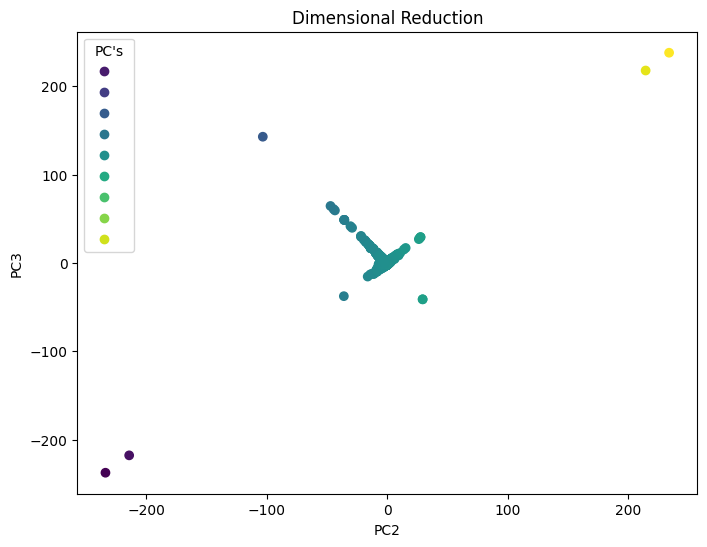

In [35]:
plt.figure(figsize=(8,6))
x_axis=pca_df['PC2']
y_axis = pca_df['PC3']
scatter = plt.scatter(x_axis, y_axis, c=pca_df.PC2)
plt.title('Dimensional Reduction')
plt.xlabel("PC2")
plt.ylabel("PC3")
plt.legend(handles=scatter.legend_elements()[0], 
           title="PC's")

plt.savefig("scatterplot_colored_by_variable_legend_first_try_matplotlib_Python.png",
                    format='png',dpi=150)
plt.show()

## Clustering

In [36]:
df_cluster = pd.DataFrame()
inertia_list = []

In [37]:
df_cluster['nb_cluster'] = range(1, 21)
df_cluster

,nb_cluster
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [38]:
from sklearn.cluster import KMeans

In [39]:
for k in df_cluster['nb_cluster']:
    kmeans=KMeans(n_clusters=k, random_state=8, n_init=10)
    fit_data = kmeans.fit(pca_df)
    inertia_list.append(kmeans.inertia_)

In [40]:
df_cluster['inertia'] = inertia_list
df_cluster

,nb_cluster,inertia
0,1,2.188822e+06
1,2,1.683946e+06
2,3,1.310941e+06
3,4,1.057698e+06
4,5,8.045856e+05
5,6,6.180918e+05
6,7,5.325275e+05
7,8,4.590414e+05
8,9,4.052616e+05
9,10,3.469408e+05


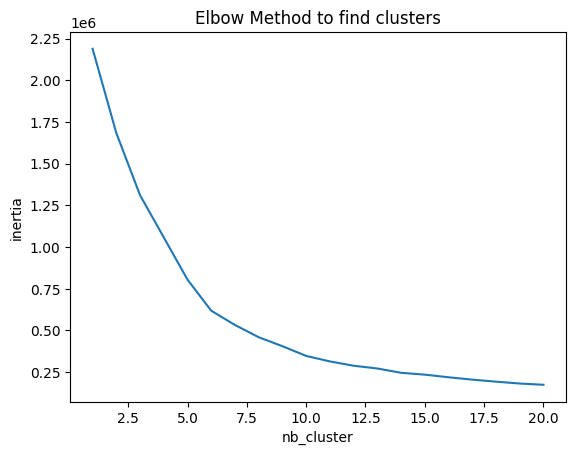

In [41]:
import matplotlib.pyplot as plt

x_axis =df_cluster['nb_cluster']
y_axis = df_cluster['inertia']
plt.plot(x_axis, y_axis)
plt.title('Elbow Method to find clusters')
plt.xlabel('nb_cluster')
plt.ylabel('inertia')
plt.show()

In [42]:
k=4
kmeans=KMeans(n_clusters = k, random_state=1)

In [43]:
fit_data = kmeans.fit(pca_df)
df['kmeans'] = kmeans.predict(pca_df)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [44]:
df

,StockCode,Description,Quantity,UnitPrice,Country,kmeans
0,3536,3919,6,2.55,36,0
1,2794,3927,6,3.39,36,0
2,3044,913,8,2.75,36,3
3,2985,1910,6,3.39,36,3
4,2984,2911,6,3.39,36,0
...,...,...,...,...,...,...
541904,1527,2379,12,0.85,13,1
541905,1803,743,6,2.10,13,1
541906,2145,749,4,4.15,13,1
541907,2146,748,4,4.15,13,1


In [45]:
df.groupby('kmeans').mean()

,StockCode,Description,Quantity,UnitPrice,Country
kmeans,,,,,
0,1494.953950,3026.975650,8.248752,3.230645,35.839737
1,1625.991951,2182.066039,17.092483,15.528788,11.469049
2,2283.000000,2274.500000,77605.000000,1.560000,36.000000
3,1834.458098,1096.751244,9.266601,4.567817,35.855268


### 1. K-Means Clustering
### K-Means clustering partitions data into k clusters, where each cluster has a centroid that is the mean of all the points in that cluster.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


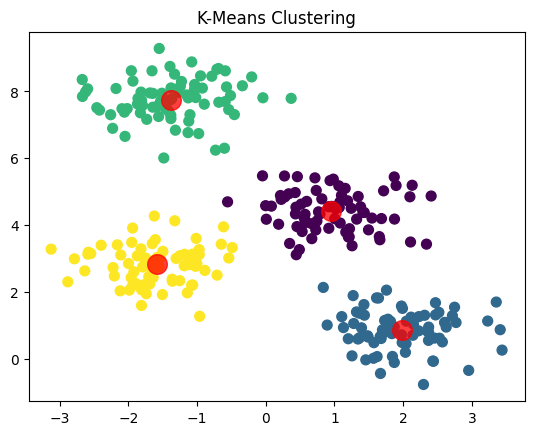

In [47]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Generate synthetic data
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Perform K-Means clustering
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

# Get cluster centroids and labels
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Plot the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', alpha=0.75)
plt.title('K-Means Clustering')
plt.show()


### 2. Hierarchical Clustering
### Hierarchical clustering builds a hierarchy of clusters and can be represented as a dendrogram.

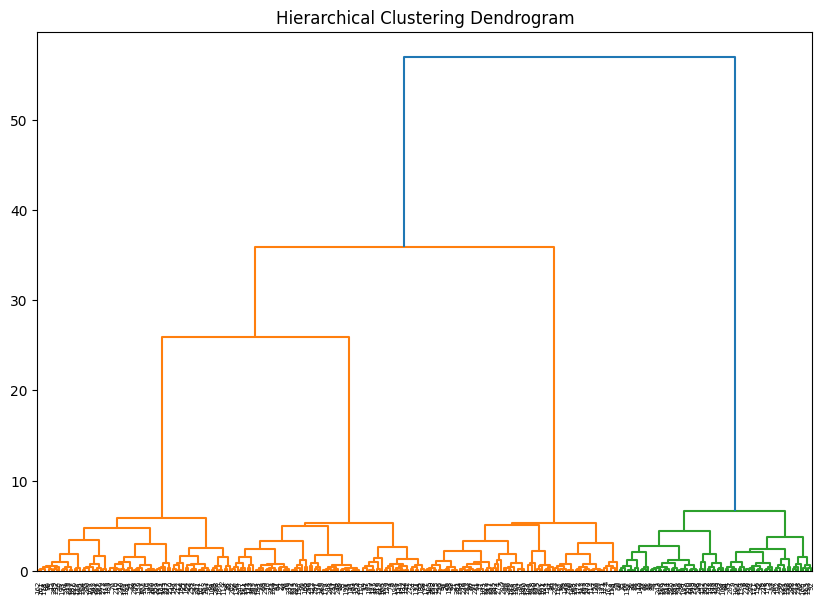

In [48]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import make_blobs

# Generate synthetic data
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Perform hierarchical clustering
linked = linkage(X, 'ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()


### 3. DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
### DBSCAN finds clusters based on the density of points.

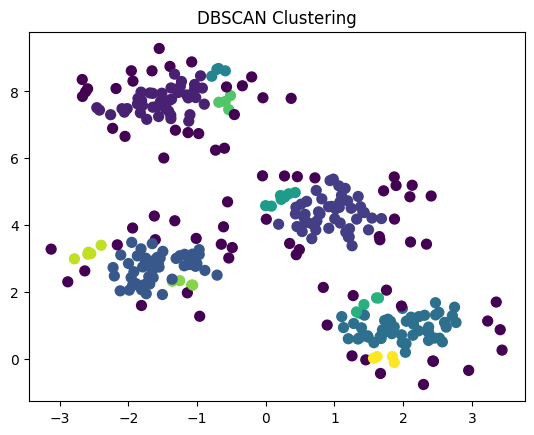

In [49]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
import numpy as np

# Generate synthetic data
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan.fit(X)

# Get cluster labels
labels = dbscan.labels_

# Plot the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.show()


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-p

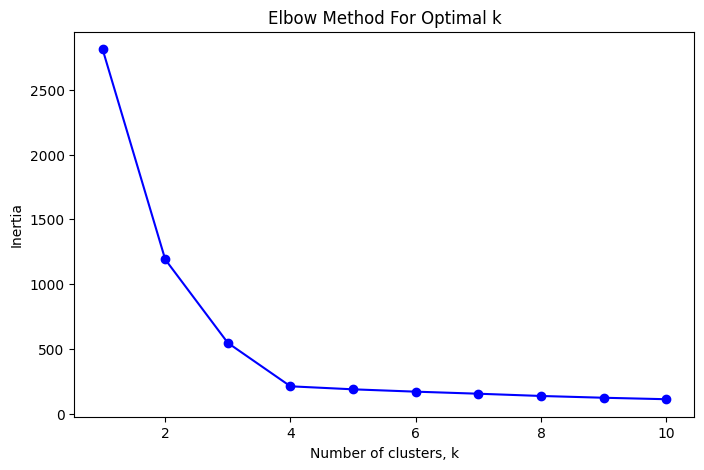

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


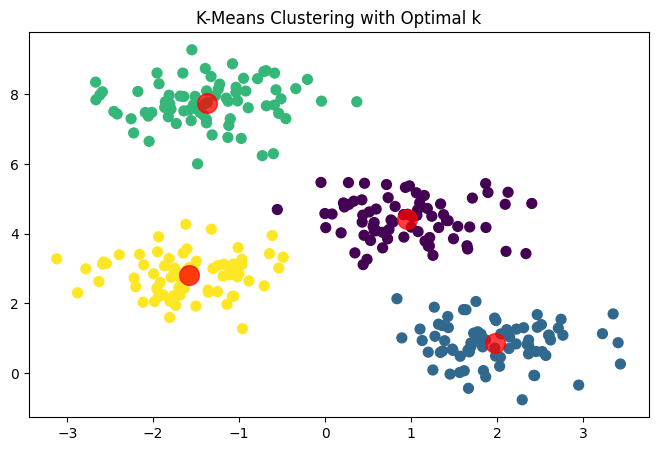

In [51]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Generate synthetic data
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Determine inertia for different numbers of clusters
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow method
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

# Perform K-Means clustering with the optimal number of clusters
optimal_k = 4  # This should be determined by the elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
kmeans.fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Plot the clusters
plt.figure(figsize=(8, 5))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', alpha=0.75)
plt.title('K-Means Clustering with Optimal k')
plt.show()


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-p

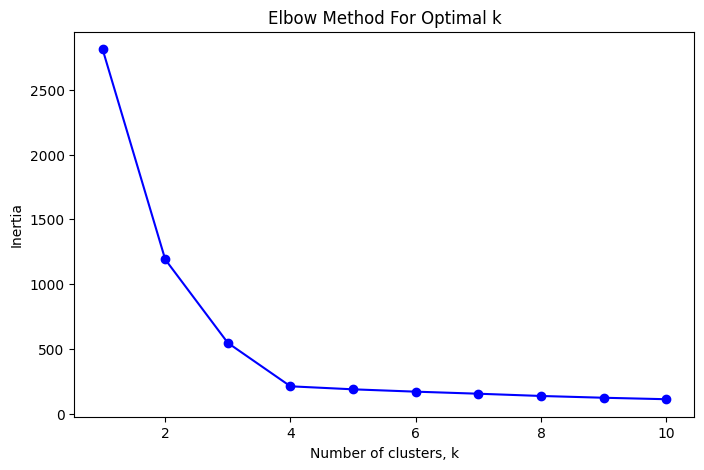

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Explained Variance Ratio: [0.82502263 0.17497737]
Cumulative Explained Variance: [0.82502263 1.        ]
               PC1       PC2
feature1 -0.410615 -0.911809
feature2  0.911809 -0.410615


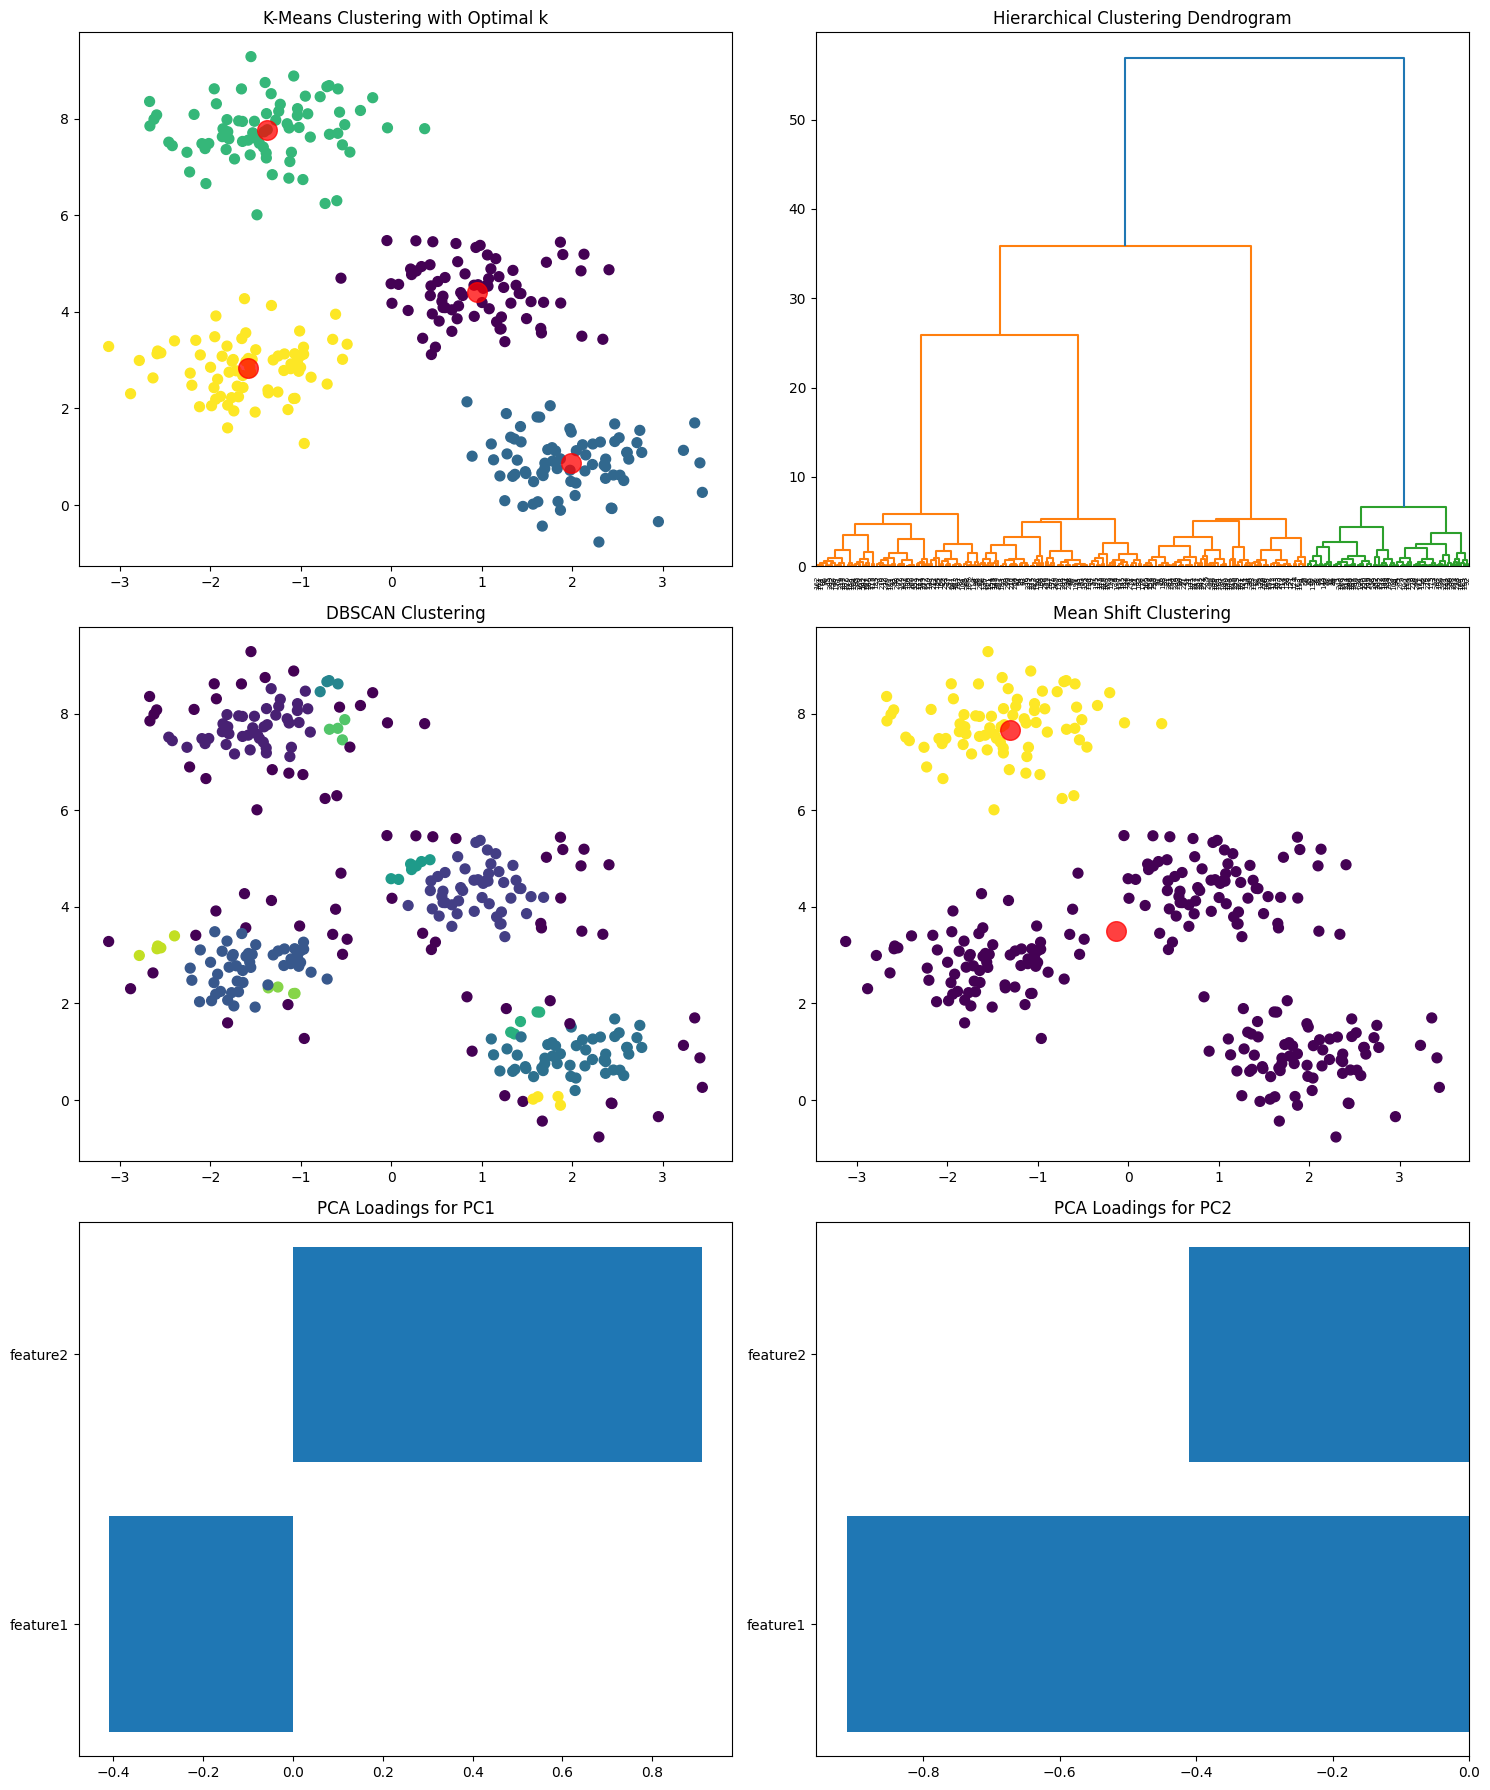

In [57]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, DBSCAN, MeanShift
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Generate synthetic data
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Determine inertia for different numbers of clusters (Elbow Method)
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow method
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

# Perform K-Means clustering with the optimal number of clusters
optimal_k = 4  # This should be determined by the elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
kmeans.fit(X)
kmeans_labels = kmeans.labels_
kmeans_centroids = kmeans.cluster_centers_

# Mean Shift Clustering
mean_shift = MeanShift()
mean_shift.fit(X)
mean_shift_labels = mean_shift.labels_
mean_shift_centroids = mean_shift.cluster_centers_

# Hierarchical Clustering
linked = linkage(X, 'ward')

# DBSCAN Clustering
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan.fit(X)
dbscan_labels = dbscan.labels_



# PCA Analysis
n_components = min(X.shape[0], X.shape[1], 2)  # Adjusted to be within the valid range
pca = PCA(n_components=n_components)
pca.fit(X)

# Explained Variance Ratio
exp_var_ratio = pca.explained_variance_ratio_
print('Explained Variance Ratio:', exp_var_ratio)

# Cumulative Explained Variance
cum_exp_var = np.cumsum(exp_var_ratio)
print('Cumulative Explained Variance:', cum_exp_var)

# Interpreting Loadings
loadings = pca.components_
feature_names = ['feature1', 'feature2']
loadings_df = pd.DataFrame(loadings.T, columns=[f'PC{i}' for i in range(1, n_components + 1)], index=feature_names)
print(loadings_df)

# Plotting
fig, axs = plt.subplots(3, 2, figsize=(15, 18))

# K-Means Plot
axs[0, 0].scatter(X[:, 0], X[:, 1], c=kmeans_labels, s=50, cmap='viridis')
axs[0, 0].scatter(kmeans_centroids[:, 0], kmeans_centroids[:, 1], s=200, c='red', alpha=0.75)
axs[0, 0].set_title('K-Means Clustering with Optimal k')

# Mean Shift Plot
axs[1, 1].scatter(X[:, 0], X[:, 1], c=mean_shift_labels, s=50, cmap='viridis')
axs[1, 1].scatter(mean_shift_centroids[:, 0], mean_shift_centroids[:, 1], s=200, c='red', alpha=0.75)
axs[1, 1].set_title('Mean Shift Clustering')


# Hierarchical Clustering Dendrogram
dendrogram(linked, ax=axs[0, 1], orientation='top', distance_sort='descending', show_leaf_counts=True)
axs[0, 1].set_title('Hierarchical Clustering Dendrogram')

# DBSCAN Plot
axs[1, 0].scatter(X[:, 0], X[:, 1], c=dbscan_labels, s=50, cmap='viridis')
axs[1, 0].set_title('DBSCAN Clustering')



# PCA Loadings Plot for PC1
axs[2, 0].barh(loadings_df.index, loadings_df['PC1'])
axs[2, 0].set_title('PCA Loadings for PC1')

# PCA Loadings Plot for PC2
axs[2, 1].barh(loadings_df.index, loadings_df['PC2'])
axs[2, 1].set_title('PCA Loadings for PC2')

plt.tight_layout()
plt.show()
